## Length of the code {-}
No restriction

**Delete this section from the report, when using this template.** 

## Data quality check / cleaning / preparation 
*By Cody Watson*

In [546]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# read data
data = pd.read_excel("df.xlsx")
binary = {'M':1,'B':0}
data['diagnosis'] = data['diagnosis'].map(binary)

# split response and predictors
y = data['diagnosis']
X = data.drop(["diagnosis", "id"], axis = 1)

# scale data
X_scaled = (X - np.min(X)) / (np.max(X) - np.min(X))
X = X_scaled

In [547]:
# Check for duplicate Ids
duplicates = data['id'].duplicated()
duplicates.sum()

0

In [548]:
# Check for missing values
missing_sum = data.isna().sum().sum()
missing_sum

0

In [549]:
# Check for multicollinearity
X.corr() 

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Radius_mean,1.000000,0.326716,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Texture_mean,0.326716,1.000000,0.332231,0.324149,-0.024737,0.235863,0.302324,0.294307,0.071390,-0.077844,...,0.355463,0.911275,0.360485,0.346576,0.076875,0.277075,0.300731,0.297040,0.104590,0.119644
perimeter_mean,0.997855,0.332231,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.324149,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.024737,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.235863,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302324,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.294307,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071390,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.077844,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Distribution of response
*By Cody Watson*

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64


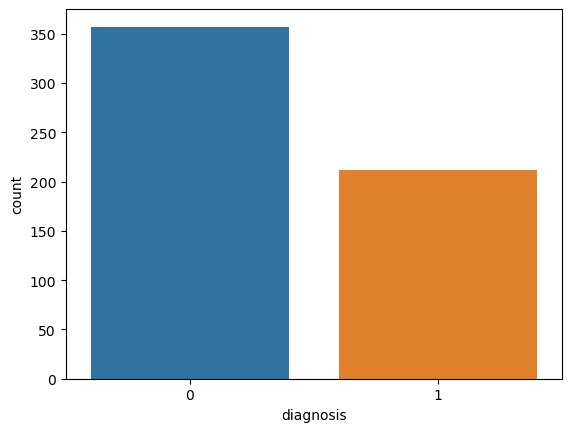

In [550]:
#...Plot for distribution of response...#
sns.countplot(x='diagnosis', data =data);
print(data.diagnosis.value_counts(normalize = True));

### VIF Analysis
*By Cody Watson*

As seen from the correlations above, there is clearly a lot of multicollinearity in the data. Therefore, VIF analysis was performed. 

In [551]:
# Get initital VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                    Feature          VIF
0                     const   111.290465
1               Radius_mean  3806.196148
2              Texture_mean    11.695362
3            perimeter_mean  3786.074821
4                 area_mean   347.765478
5           smoothness_mean     8.194222
6          compactness_mean    50.504986
7            concavity_mean    70.765861
8       concave points_mean    60.035520
9             symmetry_mean     4.230089
10   fractal_dimension_mean    15.754367
11                radius_se    75.414416
12               texture_se     4.184841
13             perimeter_se    70.353556
14                  area_se    41.214824
15            smoothness_se     4.028649
16           compactness_se    15.358195
17             concavity_se    15.694024
18        concave points_se    11.514375
19              symmetry_se     5.182281
20     fractal_dimension_se     9.719317
21             radius_worst   798.690740
22            texture_worst    18.258289
23          peri

In [552]:
# Iterate to remove all VIF values greater than 7, one by one
while vif["VIF"].max() > 7:
    max_vif_index = vif["VIF"].idxmax()
    X = X.drop(vif.loc[max_vif_index, "Feature"], axis=1)
    vif = vif.drop(max_vif_index).reset_index(drop=True)
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                Feature       VIF
0          Texture_mean  5.597683
1   concave points_mean  5.850106
2            texture_se  5.716506
3               area_se  2.991585
4         smoothness_se  5.193297
5          concavity_se  5.308785
6           symmetry_se  4.460551
7  fractal_dimension_se  5.540221


In [553]:
# get uncorrelated features
important_features = list(vif["Feature"])

In [554]:
# Split Data with uncorrelated features
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y, random_state=1, test_size=0.2, stratify = y)

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Distribution of Predictors
*By Cody Watson*

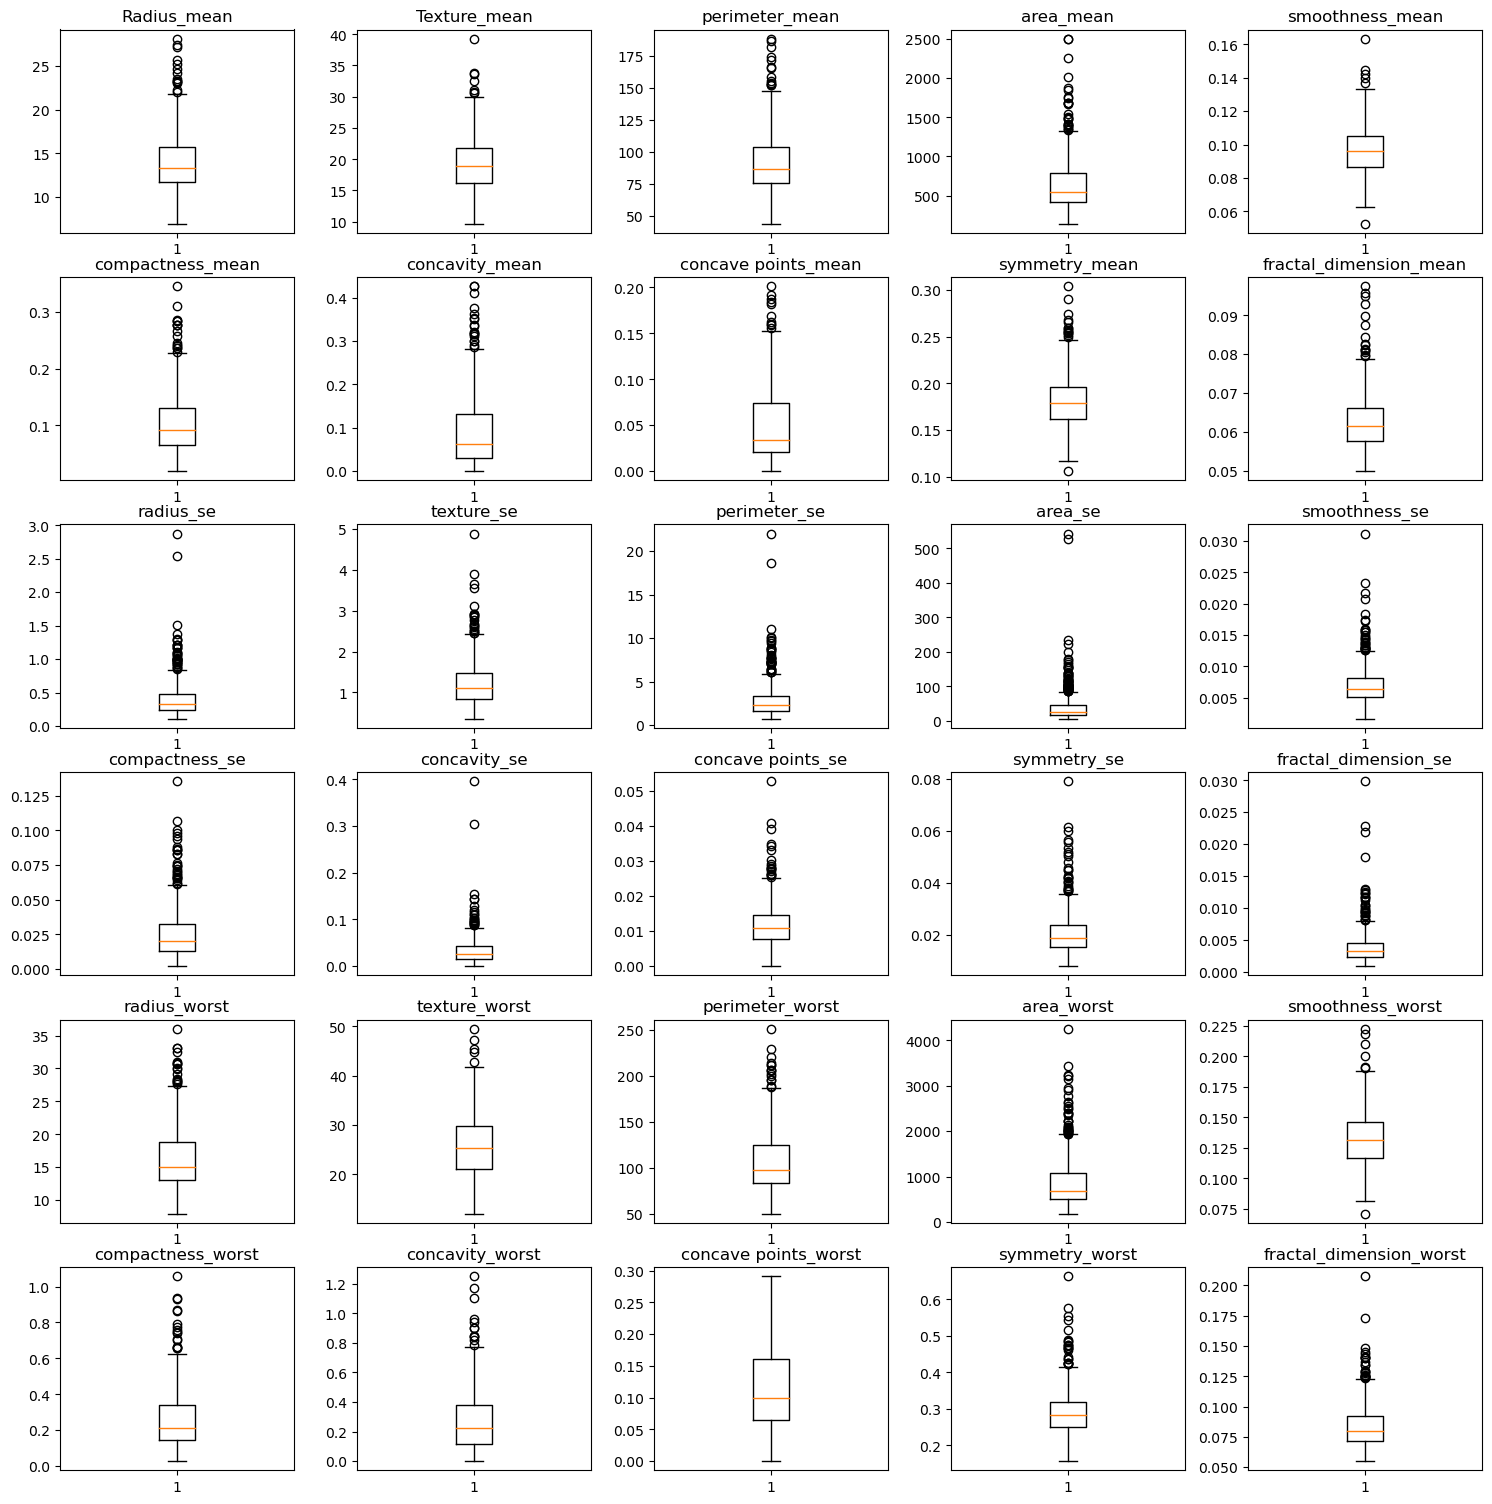

In [555]:
new_data = data.drop(["id", "diagnosis"], axis = 1)
column_names = new_data.columns.tolist()
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,15))
plt.tight_layout()
for i, col in enumerate(column_names):
    if i >= 30:
        break  
    row_idx = i // 5
    col_idx = i % 5 
    ax = axes[row_idx, col_idx]
    ax.boxplot(data[col])
    ax.set_title(col) 

### Scatterplot of each predictor vs response variable
*By Cody Watson*

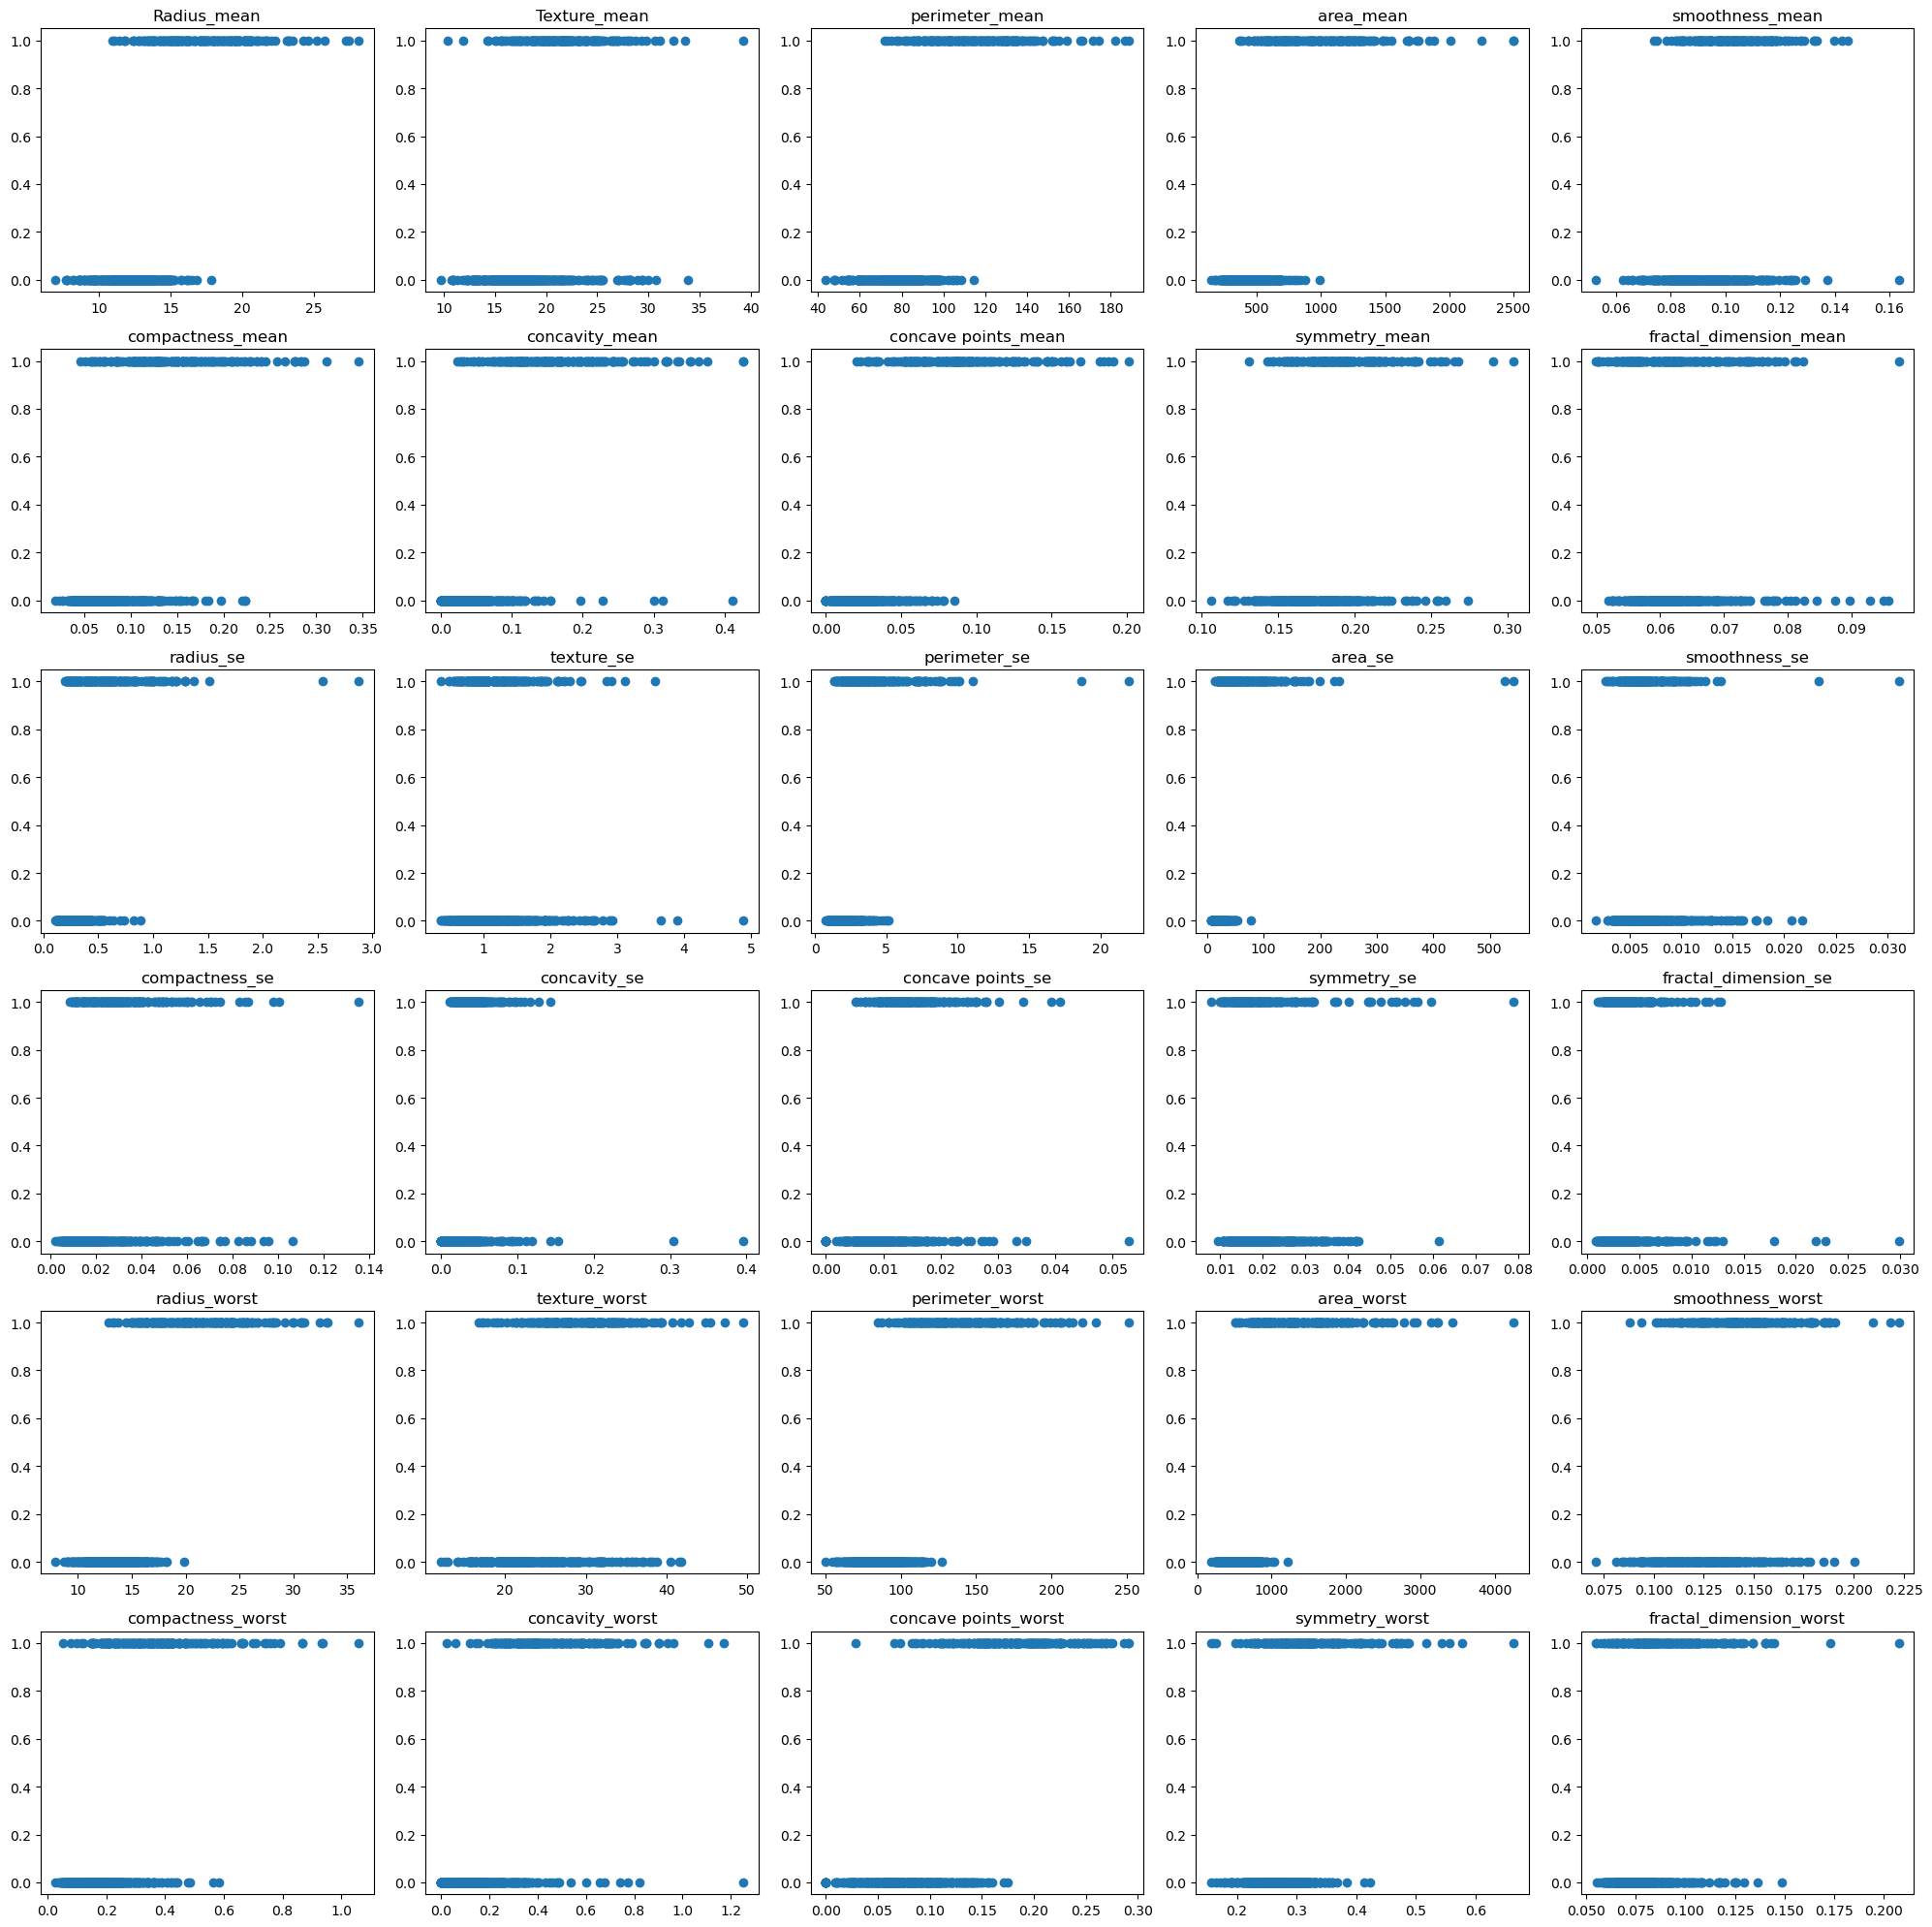

In [556]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

for i, col in enumerate(column_names):
    if i >= 30:
        break  
    row_idx = i // 5
    col_idx = i % 5 
    ax = axes[row_idx, col_idx]
    ax.scatter(data[col], data["diagnosis"])
    ax.set_title(col) 
plt.tight_layout()

## Developing the model: Hyperparameter tuning

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Base Model
*By Cody Watson*

In [557]:
# Doing train test split without VIF analysis for base model
new_data = data.copy()

# split response and predictors
y_2 = new_data['diagnosis']
X_2 = new_data.drop(["diagnosis", "id"], axis = 1)

# scale data
X_scaled_2 = (X_2 - np.min(X_2)) / (np.max(X_2) - np.min(X_2))
X_2 = X_scaled_2

# train test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=2, test_size=0.2, stratify = y)

In [558]:
# Base Model using LogisticRegression function in sklearn

from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state = 1)

logreg.fit(X_train_2, y_train_2)

y_pred = logreg.predict(X_test_2)

print(recall_score(y_test_2, y_pred))
print('Logistic Regression (Base Model) Confusion Matrix:\n',confusion_matrix(y_test_2, y_pred))

0.8809523809523809
Logistic Regression (Base Model) Confusion Matrix:
 [[72  0]
 [ 5 37]]


### AdaBoost
*By Cody Watson*

In [559]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Untuned AdaBoost Model (feature selection)
ab =  AdaBoostClassifier(DecisionTreeClassifier(random_state = 10),random_state = 10)
ab.fit(X_train, y_train);

y_pred_ab = ab.predict(X_test)

print(recall_score(y_test, y_pred_ab))
print('Adaptive Boosting Untuned Confusion Matrix:\n',confusion_matrix(y_test, y_pred_ab))

0.8809523809523809
Adaptive Boosting Untuned Confusion Matrix:
 [[68  4]
 [ 5 37]]


In [560]:
# Coarse Grid Search
ab =  AdaBoostClassifier(DecisionTreeClassifier(random_state = 10),random_state = 10)
hp_grid_ab ={'n_estimators':[10,500,1000], 
             'estimator__max_depth': [5,15,25], 
             'learning_rate': [0,0.001,0.01]}
clf_ab = GridSearchCV(ab, hp_grid_ab, cv = 5, scoring = ['recall','accuracy'], refit = "recall", verbose = 1, n_jobs = -1);
clf_ab.fit(X_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [561]:
# getting best params
clf_ab.best_params_

{'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 500}

In [562]:
# Getting recall score and showing confusion matrix

best_hp_ab = clf_ab.best_params_

ab_final = AdaBoostClassifier(DecisionTreeClassifier(random_state = 10, max_depth = best_hp_ab["estimator__max_depth"]),random_state = 10, n_estimators = best_hp_ab["n_estimators"], learning_rate = best_hp_ab['learning_rate'])

ab_final.fit(X_train, y_train)

y_pred_ab = ab_final.predict(X_test)

print(recall_score(y_test, y_pred_ab))
print('Adaptive Boosting Tuned Confusion Matrix:\n',confusion_matrix(y_test, y_pred_ab))

0.9047619047619048
Adaptive Boosting Tuned Confusion Matrix:
 [[66  6]
 [ 4 38]]


In [563]:
# Fine Grid Search 1
ab =  AdaBoostClassifier(DecisionTreeClassifier(random_state = 10),random_state = 10)
hp_grid_ab ={'n_estimators': [450,500,550],
             'estimator__max_depth': [4,5,6], 
             'learning_rate': [0.001,0.01,0.1]}
clf_ab = GridSearchCV(ab, hp_grid_ab, cv = 5, scoring = ['recall','accuracy'], refit = "recall", verbose = 1, n_jobs = -1);
clf_ab.fit(X_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [564]:
# getting best params
clf_ab.best_params_

{'estimator__max_depth': 6, 'learning_rate': 0.001, 'n_estimators': 450}

In [565]:
# Getting recall score and showing confusion matrix
best_hp_ab = clf_ab.best_params_

ab_final = AdaBoostClassifier(DecisionTreeClassifier(random_state = 10, max_depth = best_hp_ab["estimator__max_depth"]),random_state = 10, n_estimators = best_hp_ab["n_estimators"], learning_rate = best_hp_ab['learning_rate'])

ab_final.fit(X_train, y_train)

y_pred_ab = ab_final.predict(X_test)

print(recall_score(y_test, y_pred_ab))
print('Adaptive Boosting Tuned Confusion Matrix:\n',confusion_matrix(y_test, y_pred_ab))

0.9047619047619048
Adaptive Boosting Tuned Confusion Matrix:
 [[67  5]
 [ 4 38]]


In [566]:
# Fine Grid Search 2
ab =  AdaBoostClassifier(DecisionTreeClassifier(random_state = 10),random_state = 10)
hp_grid_ab ={'n_estimators': [430,440,450,460,470],
             'estimator__max_depth': [5,6,7], 
             'learning_rate': [0.001,0.0015,0.0012]}
clf_ab = GridSearchCV(ab, hp_grid_ab, cv = 5, scoring = ['recall','accuracy'], refit = "recall", verbose = 1, n_jobs = -1);
clf_ab.fit(X_train, y_train);

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [567]:
# getting best params
clf_ab.best_params_

{'estimator__max_depth': 6, 'learning_rate': 0.001, 'n_estimators': 460}

In [568]:
# Getting recall score and showing confusion matrix
best_hp_ab = clf_ab.best_params_

ab_final = AdaBoostClassifier(DecisionTreeClassifier(random_state = 10, max_depth = best_hp_ab["estimator__max_depth"]),random_state = 10, n_estimators = best_hp_ab["n_estimators"], learning_rate = best_hp_ab['learning_rate'])

ab_final.fit(X_train, y_train)

y_pred_ab = ab_final.predict(X_test)

print(recall_score(y_test, y_pred_ab))
print('Adaptive Boosting Tuned Confusion Matrix:\n',confusion_matrix(y_test, y_pred_ab))

0.9047619047619048
Adaptive Boosting Tuned Confusion Matrix:
 [[67  5]
 [ 4 38]]


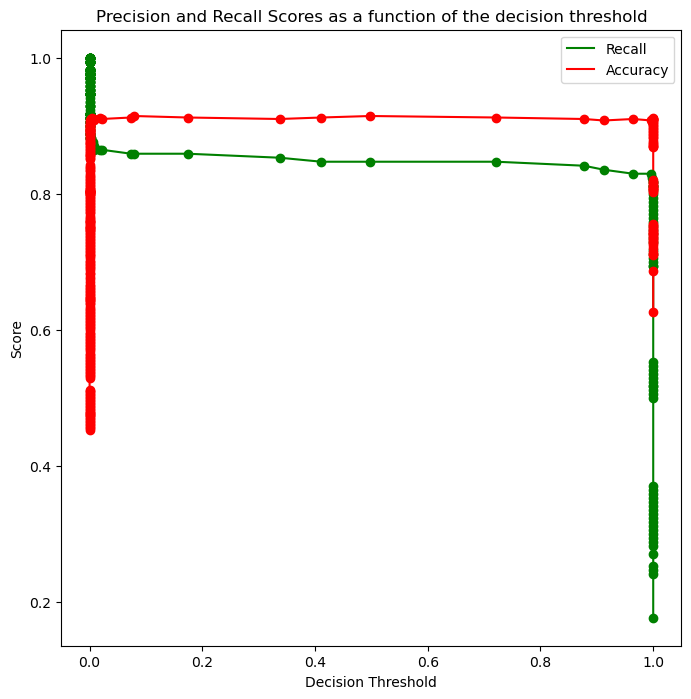

In [619]:
# using results from coarse grid search as fine tuning did not improve model 
from sklearn.model_selection import cross_val_score, cross_val_predict
ab_final = AdaBoostClassifier(DecisionTreeClassifier(random_state = 10, max_depth = 5),random_state = 10, n_estimators = 500, learning_rate = 0.01).fit(X_train, y_train)
cross_val_ypred = cross_val_predict(ab_final, X_train, y_train, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
acc = np.ndarray(shape = (len(thresholds),))
i = 0
for th in thresholds:
    y_pred = cross_val_ypred[:,1] > th
    y_pred = y_pred.astype(int)
    acc[i] = accuracy_score(y_pred, y_train)
    i = i + 1
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, acc, "r-", label="Accuracy")
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [620]:
my_df_filtered = my_df[(my_df["accuracy"] >= 0.9) & (my_df["recall"] >= 0.9)].sort_values(by = "recall", ascending = False)
my_df_filtered

,accuracy,recall,threshold
0,0.905495,0.905882,0.01
47,0.918681,0.905882,0.48
34,0.914286,0.905882,0.35
35,0.914286,0.905882,0.36
36,0.914286,0.905882,0.37
...,...,...,...
65,0.918681,0.9,0.66
64,0.918681,0.9,0.65
63,0.918681,0.9,0.64
62,0.918681,0.9,0.63


In [621]:
# threshold of 0.01
ab_final = AdaBoostClassifier(DecisionTreeClassifier(random_state = 10, max_depth = 5),random_state = 10, n_estimators = 500, learning_rate = 0.01).fit(X_train, y_train)

predicted = ab_final.predict_proba(X_test)[:,1]


thresh = 0.01
predicted_class = predicted > thresh
predicted_class = predicted_class.astype(int)

print("Test Accuracy:",accuracy_score(predicted_class, y_test))
print("Test Recall:",recall_score(y_test, predicted_class))

Test Accuracy: 0.9473684210526315
Test Recall: 0.9285714285714286


## Random Forest
*By Aniket Ahuja*

In [574]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestClassifier


#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus
import time as tm

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y ,test_size=0.3, random_state=45, stratify = y)

In [576]:
#started n_estimators at range 100 to 1000 by 100 got 100
#started max depth range 1 to 14 by 2 and got 9

#moved to n_estimator range of 10 to 200 by 20 got 30
#moved to max_depth range of 3 to 10 by 2 and got 7

#moved to n_estimator range of 10 to 50 by 10 got 20
#moved to max_depth range of 3 to 10 by 1 and got 5

# param_grid = {
#     'n_estimators': range(15,25,1),
#     'max_depth': range(3,10,1),

# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=45), param_grid, scoring=['accuracy','recall'], 
#                            refit="recall", cv=5, n_jobs=-1, verbose = True)
# grid_search.fit(X_train, y_train)

In [577]:
param_grid = {
    'n_estimators': range(20,25,1),
    'max_depth': range(5,8,1),
    'max_leaf_nodes': range(10,14,1),
    'max_features': range(8,12,1)
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=45), param_grid, scoring=['accuracy','recall'], 
                           refit="recall", cv=5, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45), n_jobs=-1,
             param_grid={'max_depth': range(5, 8), 'max_features': range(8, 12),
                         'max_leaf_nodes': range(10, 14),
                         'n_estimators': range(20, 25)},
             refit='recall', scoring=['accuracy', 'recall'], verbose=True)

In [578]:
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test accuracy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best accuracy Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

Train accuracy : 0.990
Test accuracy : 0.901
Best accuracy Through Grid Search : 0.933
Best params for recall
{'max_depth': 6, 'max_features': 8, 'max_leaf_nodes': 12, 'n_estimators': 23}


In [579]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score

Recall:  0.875


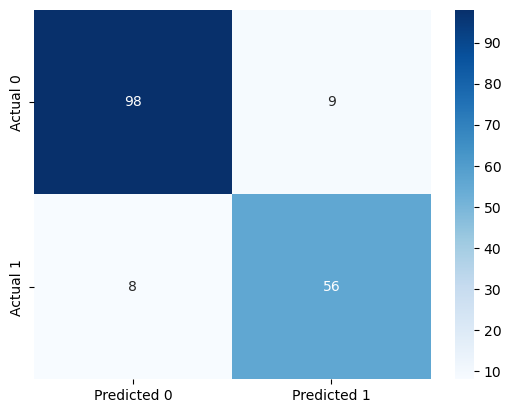

In [580]:
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

In [581]:
best_model = grid_search.best_estimator_
feature_importances = np.mean([
    tree.feature_importances_ for tree in best_model.estimators_
], axis=0)

feature_importances

X_train.columns

data = {'feature importnaces': feature_importances, 'predictors': X_train.columns}
df = pd.DataFrame(data)
df_sorted = df.sort_values('feature importnaces', ascending=False)
df_sorted.head(10)

,feature importnaces,predictors
1,0.720959,concave points_mean
3,0.120351,area_se
0,0.056734,Texture_mean
7,0.039851,fractal_dimension_se
5,0.033513,concavity_se
2,0.013988,texture_se
4,0.011938,smoothness_se
6,0.002665,symmetry_se


In [582]:
top_10 = df_sorted.head(10)
list(top_10['predictors'])

['concave points_mean',
 'area_se',
 'Texture_mean',
 'fractal_dimension_se',
 'concavity_se',
 'texture_se',
 'smoothness_se',
 'symmetry_se']

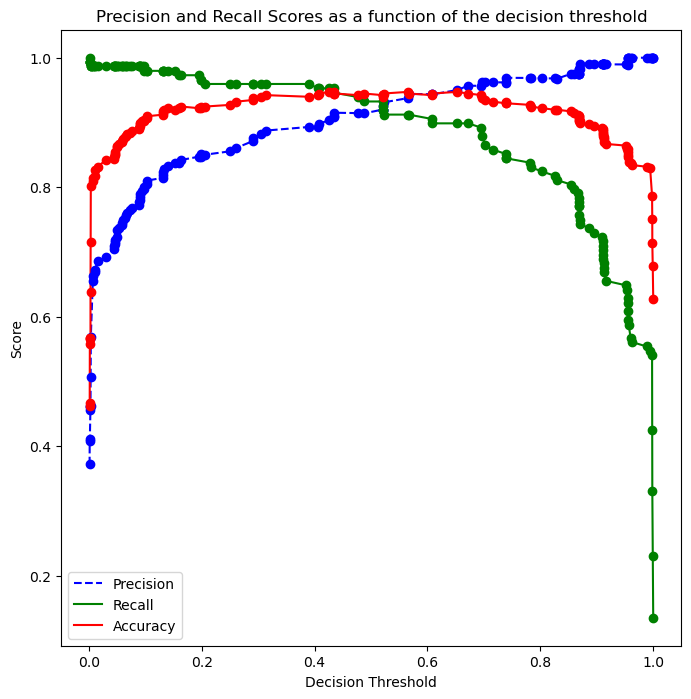

In [583]:
from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_ypred = cross_val_predict(best_model, X_train, y_train, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
acc = np.ndarray(shape = (len(thresholds),))
i = 0
for th in thresholds:
    y_pred = cross_val_ypred[:,1] > th
    y_pred = y_pred.astype(int)
    acc[i] = accuracy_score(y_pred, y_train)
    i = i + 1
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, acc, "r-", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [584]:
all_thresholds = np.concatenate([thresholds.reshape(-1,1), acc.reshape(-1,1), r[:-1].reshape(-1,1)], axis = 1)
recall_more_than_90 = all_thresholds[(all_thresholds[:,2]>0.9) & (all_thresholds[:,1]>0.9),:]
recall_more_than_90[0]

array([0.09397388, 0.90201005, 0.98648649])

Accuracy:  87.71929824561403
ROC-AUC:  0.971232476635514
Precision:  0.7721518987341772
Recall:  0.953125


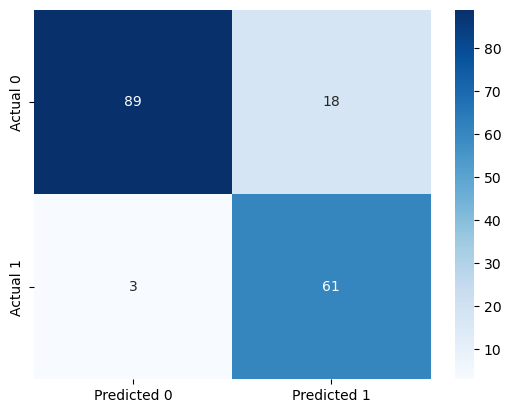

In [585]:
desired_threshold =0.09397388

y_pred_prob = best_model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

Accuracy:  93.96984924623115
ROC-AUC:  0.9991351351351351
Precision:  0.8604651162790697
Recall:  1.0


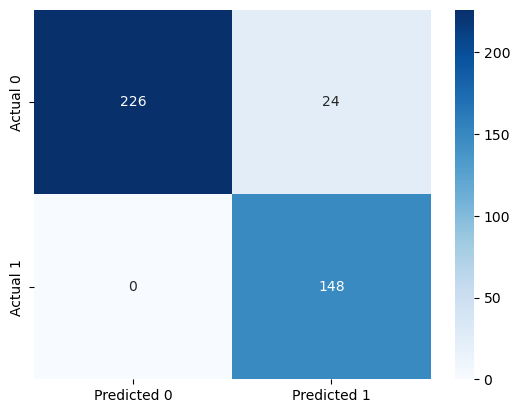

In [586]:
desired_threshold = 0.09397388

y_pred_prob = best_model.predict_proba(X_train)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

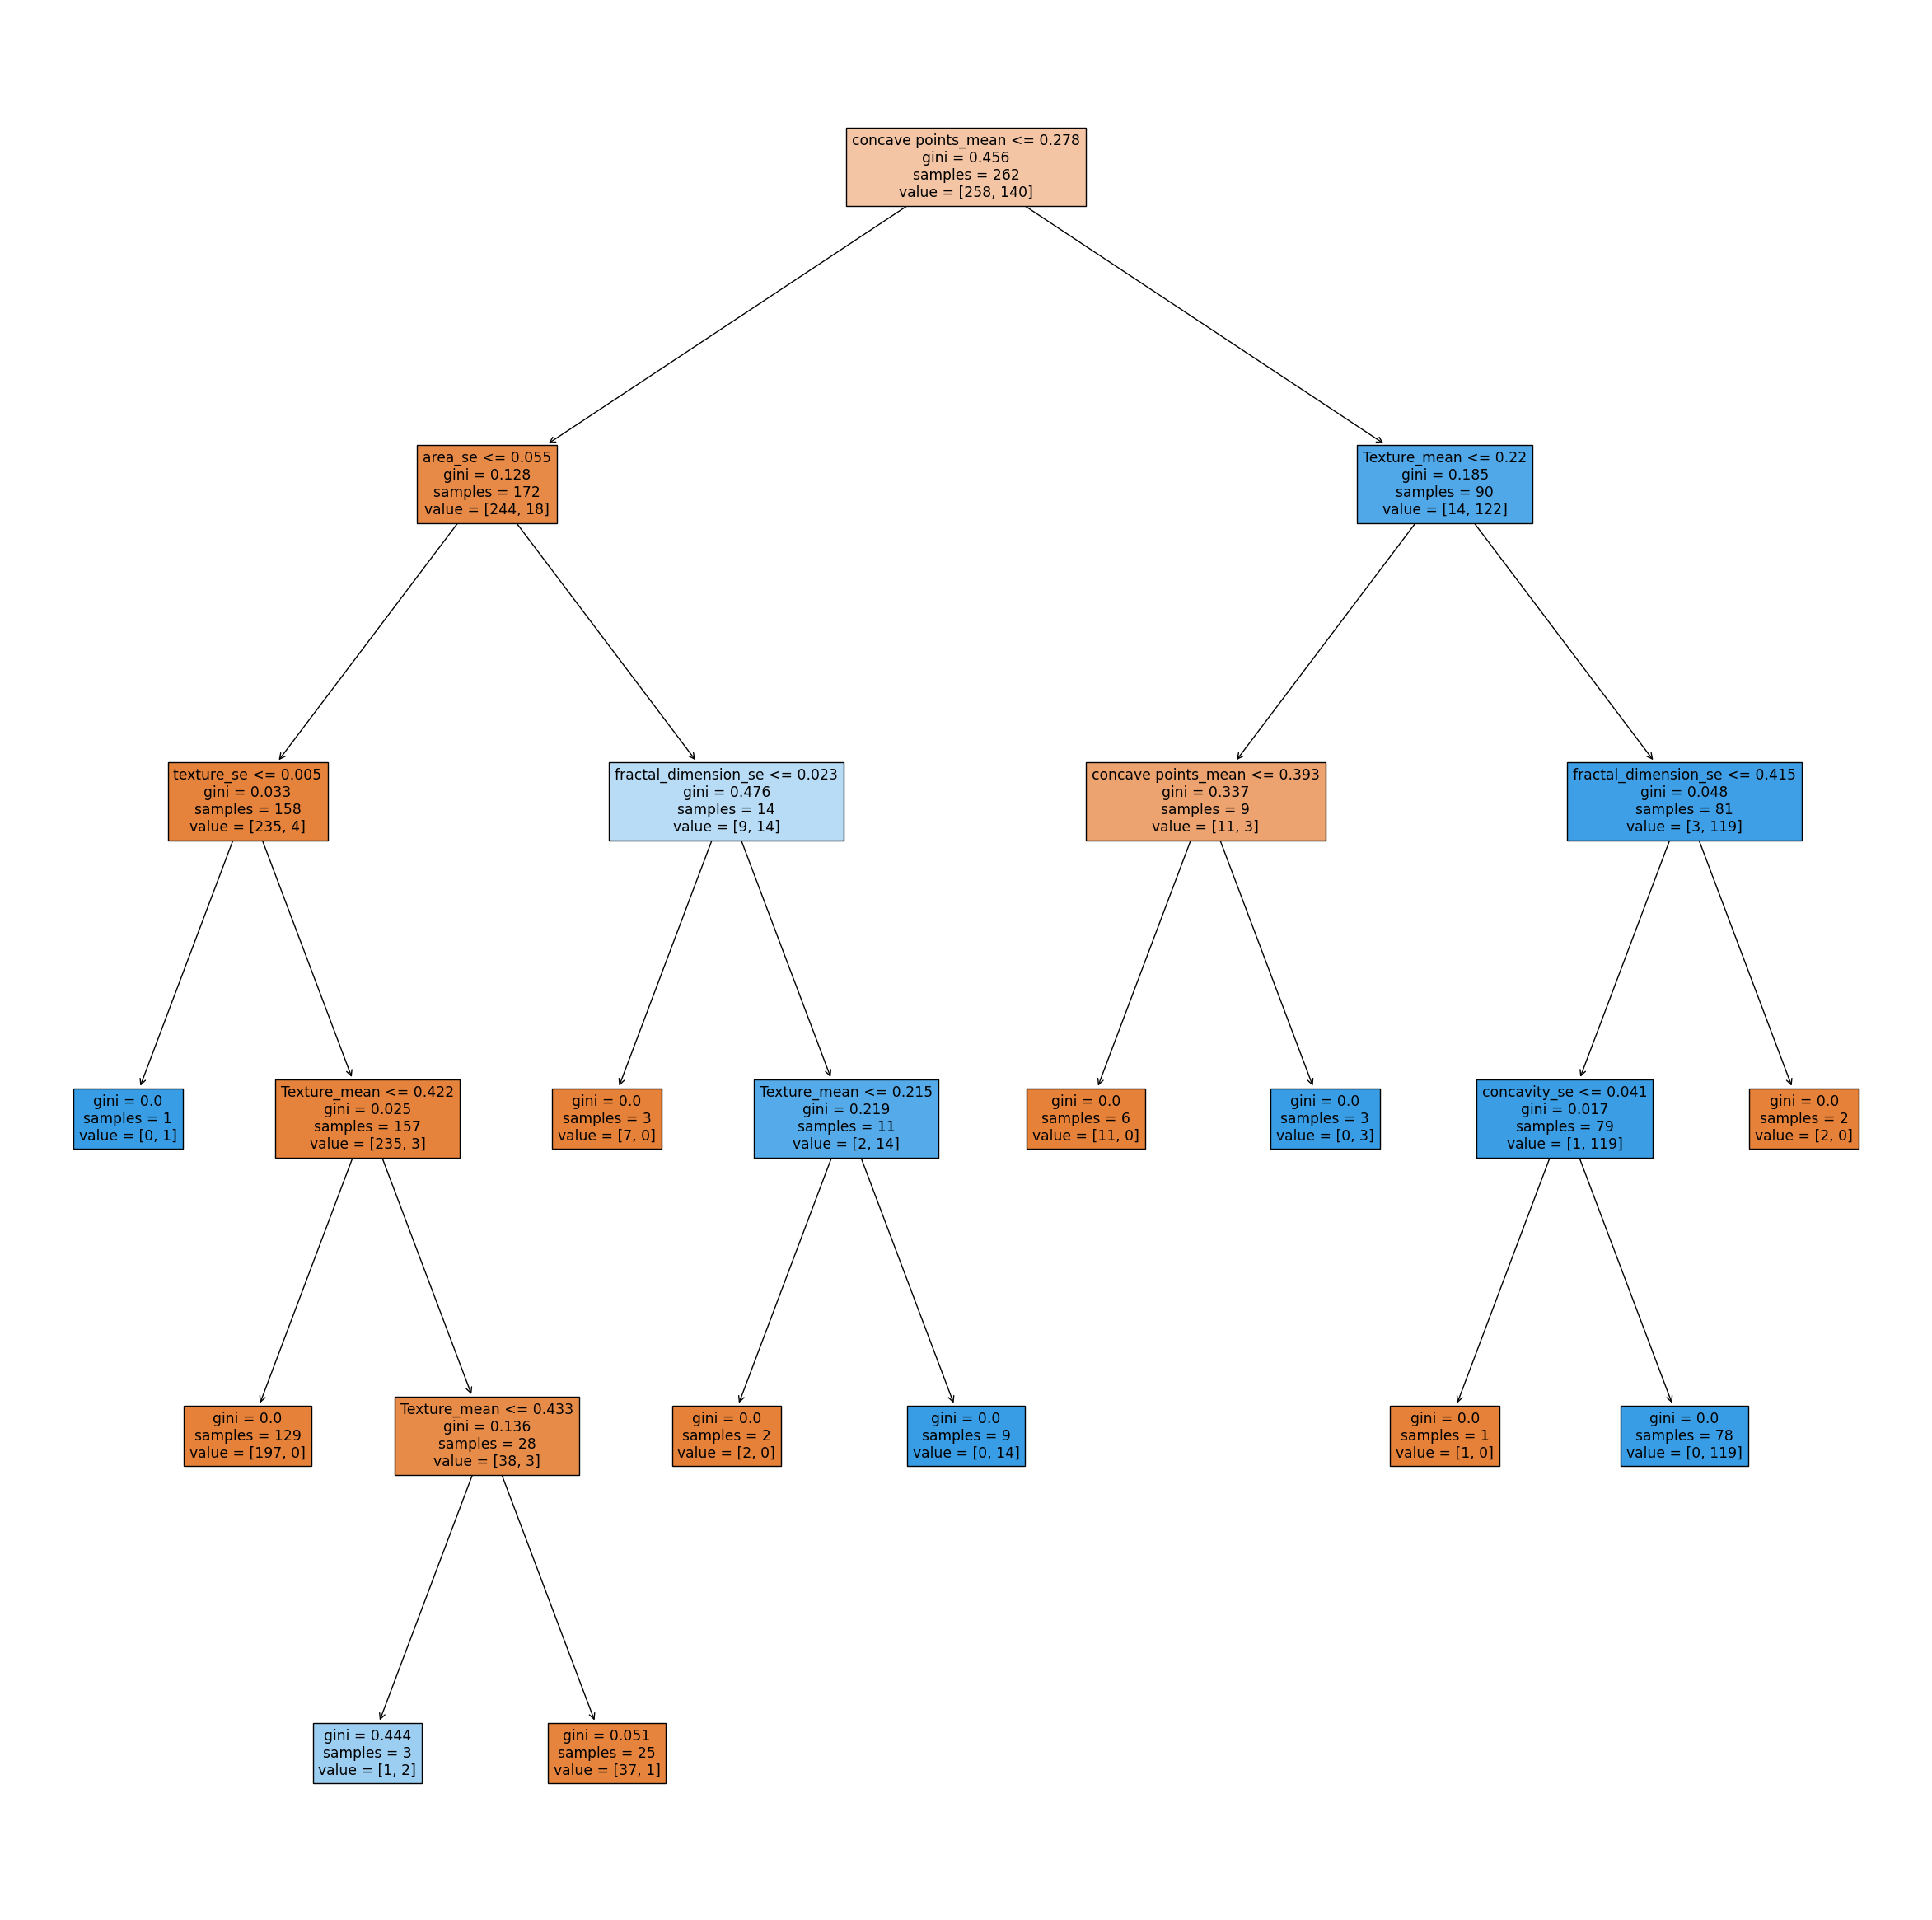

In [587]:
from sklearn import tree
plt.figure(figsize=(30, 30)) 
tree_estimator = best_model.estimators_[10]
tree.plot_tree(tree_estimator, feature_names=X_train.columns, filled=True)
plt.show()

### Decision Tree
*By Sid Taneja*

In [588]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
from sklearn import tree
import pydotplus

import time as time

In [589]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y, test_size = 0.2, random_state = 45, stratify = y)

In [590]:
#Initial Naive Decision Tree
model = DecisionTreeClassifier(random_state=1, max_depth=3) 
naivetree = model.fit(X_train, y_train)

In [591]:
importance = list(naivetree.feature_importances_)
name = list(naivetree.feature_names_in_)
df = pd.DataFrame()
df['Feature Name'] = name
df['Feature Importance'] = importance

Accuracy:  85.96491228070175
ROC-AUC:  0.9012896825396827
Recall:  0.7619047619047619


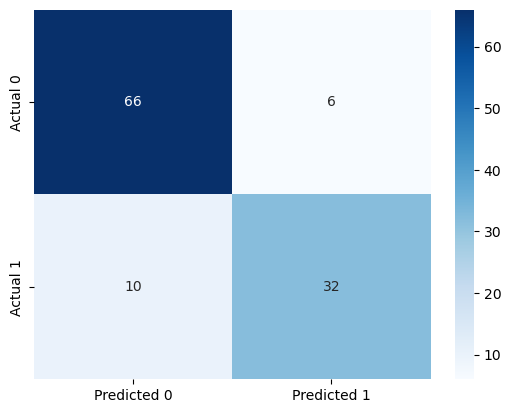

In [592]:
#Analysis
y_pred = naivetree.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing recall (false negatice)
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted 0', 'Predicted 1'], 
            index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

In [593]:
# Tuned Decision Tree
param_grid = {    
    'max_depth': (1,6),
    'max_leaf_nodes': range(2,21),
    'max_features': range(1,30)
}

start_time = time.time()
skf = StratifiedKFold(n_splits=2)#The folds are made by preserving the percentage of samples for each class.

#Minimizing FNR is equivalent to maximizing recall
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, scoring=['recall'], 
                           refit="recall", cv=skf, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

# make the predictions
y_pred = grid_search.predict(X_test)

print('Train accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Best recall Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for recall')
print(grid_search.best_params_)

print("Time taken =", round((time.time() - start_time)), "seconds")

Fitting 2 folds for each of 1102 candidates, totalling 2204 fits
Train accuracy : 0.971
Best recall Through Grid Search : 0.888
Best params for recall
{'max_depth': 6, 'max_features': 4, 'max_leaf_nodes': 13}
Time taken = 3 seconds


In [594]:
# Tuned Model
truemodel = DecisionTreeClassifier(random_state=1, max_depth = 6, max_leaf_nodes=5, max_features=7).fit(X_train, y_train)

Accuracy:  92.98245614035088
Recall:  0.8571428571428571


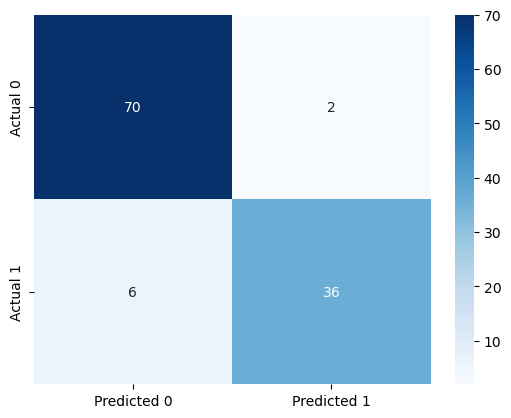

In [595]:
# Analysis
y_pred = truemodel.predict(X_test)
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing recall (false negative)
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted 0', 'Predicted 1'], 
            index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

In [596]:
# Feature Importance, Output Hidden
importance = list(truemodel.feature_importances_)
name = list(truemodel.feature_names_in_)
df = pd.DataFrame()
df['Feature Name'] = name
df['Feature Importance'] = importance

[Text(0.5, 0.875, 'x[3] <= 0.053\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'),
 Text(0.25, 0.625, 'x[1] <= 0.278\ngini = 0.217\nsamples = 307\nvalue = [269, 38]'),
 Text(0.125, 0.375, 'gini = 0.058\nsamples = 267\nvalue = [259, 8]'),
 Text(0.375, 0.375, 'x[0] <= 0.17\ngini = 0.375\nsamples = 40\nvalue = [10, 30]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.125, 'gini = 0.278\nsamples = 36\nvalue = [6, 30]'),
 Text(0.75, 0.625, 'x[1] <= 0.232\ngini = 0.193\nsamples = 148\nvalue = [16, 132]'),
 Text(0.625, 0.375, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.875, 0.375, 'gini = 0.074\nsamples = 130\nvalue = [5, 125]')]

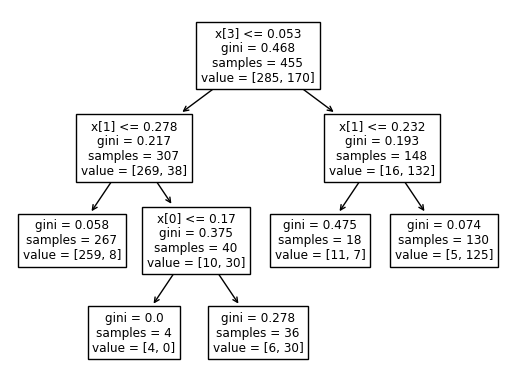

In [597]:
# Picture of new model
tree.plot_tree(truemodel)

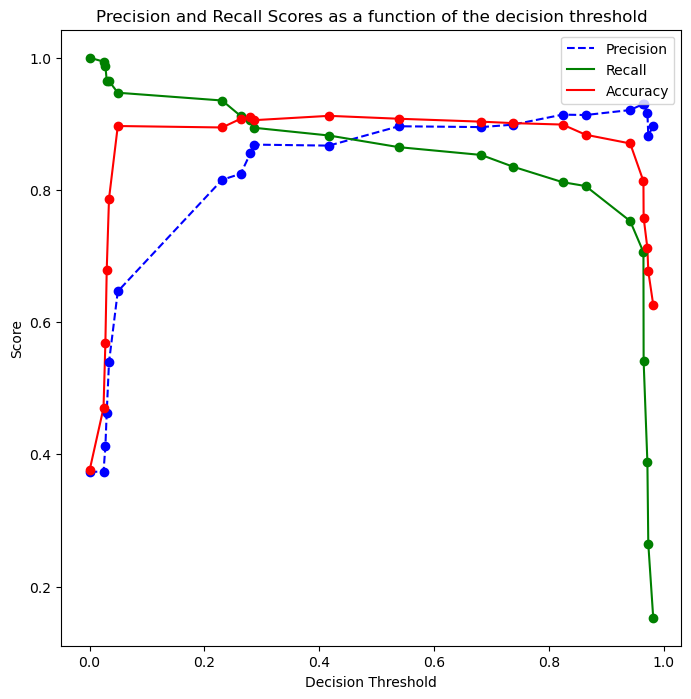

In [598]:
# Tuning decision threshold
from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_ypred = cross_val_predict(truemodel, X_train, y_train, cv = 5, method = 'predict_proba')

p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])
acc = np.ndarray(shape = (len(thresholds),))
i = 0
for th in thresholds:
    y_pred = cross_val_ypred[:,1] > th
    y_pred = y_pred.astype(int)
    acc[i] = accuracy_score(y_pred, y_train)
    i = i + 1
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, acc, "r-", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

In [599]:
# Finding desired threshold
all_thresholds = np.concatenate([thresholds.reshape(-1,1), acc.reshape(-1,1), r[:-1].reshape(-1,1)], axis = 1)
# Ensures Recall more than 90
greater = all_thresholds[(all_thresholds[:,2]>0.9) & (all_thresholds[:,1]>0.9),:]
greater[0]

array([0.26315789, 0.90769231, 0.91176471])

Accuracy:  92.10526315789474
Recall:  0.8809523809523809


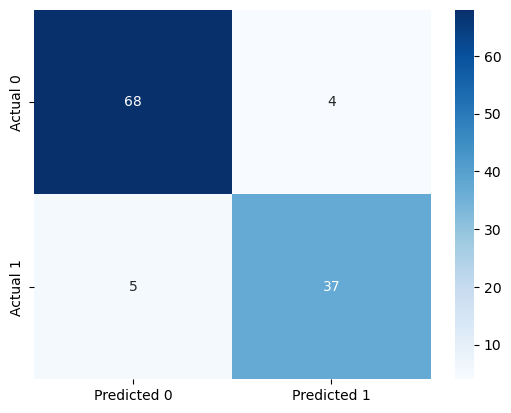

In [600]:
# Analyzing results with new decision threshold
desired_threshold = 0.26315789
y_pred_prob = truemodel.predict_proba(X_test)[:,1]

y_pred2 = y_pred_prob > desired_threshold
y_pred2 = y_pred2.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred2, y_test)*100)  

#Computing the recall
print("Recall: ", recall_score(y_test, y_pred2))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred2), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

### Lasso/Ridge
*By Liam Warin*

In [601]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y, test_size=0.2, random_state=42, stratify =y)


# Run Logistic regression with L1 penalty (Lasso)
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso.fit(X_train, y_train)

# Run Logistic regression with L2 penalty (Ridge)
ridge = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
ridge.fit(X_train, y_train)

# Predict test data
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Calculate Accuracy and Recall
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
recall_lasso = recall_score(y_test, y_pred_lasso)

accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
recall_ridge = recall_score(y_test, y_pred_ridge)

print(f"Lasso Accuracy: {accuracy_lasso}")
print(f"Lasso Recall: {recall_lasso}")

print(f"Ridge Accuracy: {accuracy_ridge}")
print(f"Ridge Recall: {recall_ridge}")

Lasso Accuracy: 0.9210526315789473
Lasso Recall: 0.9285714285714286
Ridge Accuracy: 0.8859649122807017
Ridge Recall: 0.7142857142857143


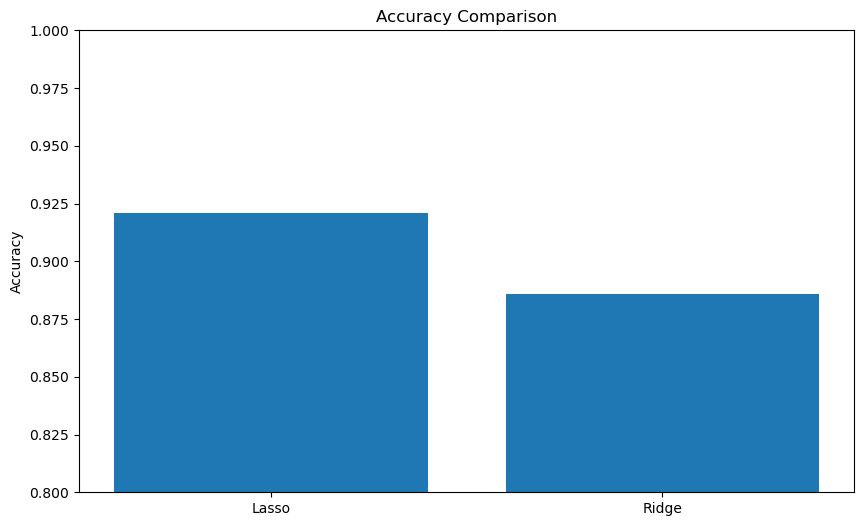

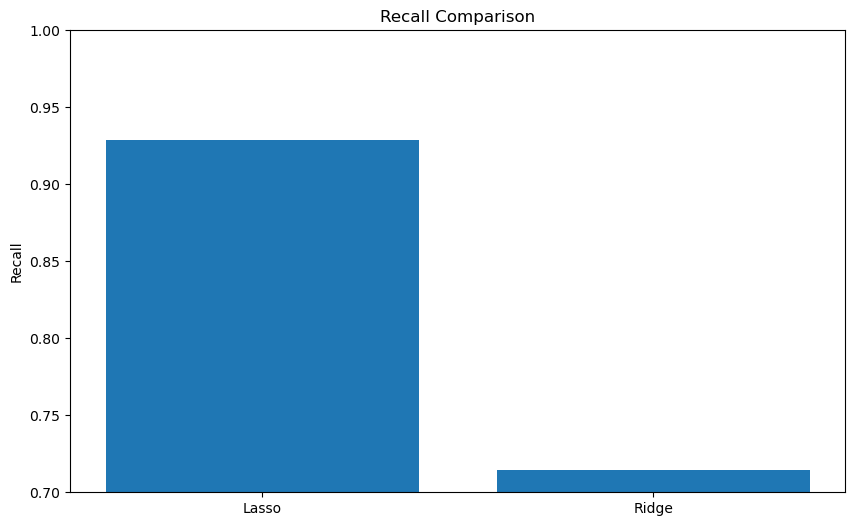

In [603]:
plt.figure(figsize=(10, 6))
plt.bar(['Lasso', 'Ridge'], [accuracy_lasso, accuracy_ridge])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
plt.bar(['Lasso', 'Ridge'], [recall_lasso, recall_ridge])
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim([0.7, 1])
plt.show()

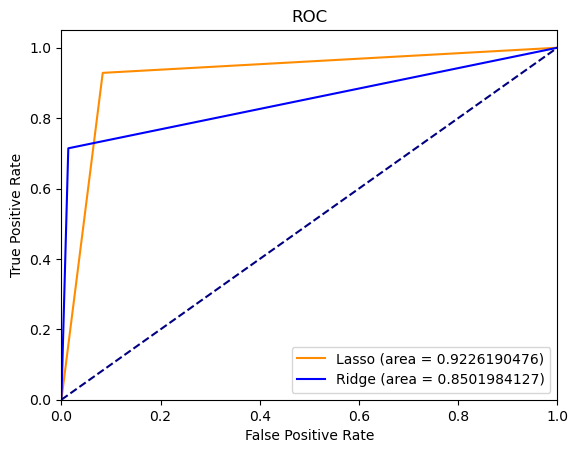

In [604]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for Lasso
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_pred_lasso)
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)

# Compute ROC curve for Ridge
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_pred_ridge)
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

plt.figure()
plt.plot(fpr_lasso, tpr_lasso, color='darkorange', label='Lasso (area = %0.10f)' % roc_auc_lasso)
plt.plot(fpr_ridge, tpr_ridge, color='blue', label='Ridge (area = %0.10f)' % roc_auc_ridge)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Model Ensemble 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**


### Voting ensemble
*By Cody Watson*

In [605]:
en=VotingClassifier(estimators = [('ada',ab_final),('rf',best_model),("dt",truemodel), ('lasso',lasso),('ridge',ridge)])
en.fit(X_train,y_train)
print("Voting Ensemble model recall = ", recall_score(y_test,en.predict(X_test)))

Voting Ensemble model recall =  0.8809523809523809


### Stacking ensemble(s)
*By Sid Taneja*

In [606]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV, ParameterGrid, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time
import xgboost as xgb
from pyearth import Earth

In [607]:
# Lasso
ensemble_model_lr = StackingClassifier(estimators=[('ada',ab_final),('rf',best_model),('dt',truemodel),('lasso',lasso),('ridge',ridge)],
                                   final_estimator=LogisticRegression(random_state = 1,penalty='l1', solver='liblinear'),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1))
ensemble_model_lr.fit(X_train,y_train)
y_pred = ensemble_model_lr.predict(X_test)
print(recall_score(y_test,y_pred))

0.9285714285714286


In [608]:
# Ridge
ensemble_model_rr = StackingClassifier(estimators=[('ada',ab_final),('rf',best_model),('dt',truemodel),('lasso',lasso),('ridge',ridge)],
                                   final_estimator=LogisticRegression(random_state = 1, penalty='l2', solver='liblinear'),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1))
ensemble_model_rr.fit(X_train,y_train)
y_pred = ensemble_model_rr.predict(X_test)
print(recall_score(y_test,y_pred))

0.9047619047619048


In [609]:
# Random Forest
ensemble_model_rf = StackingClassifier(estimators=[('ada',ab_final),('rf',best_model),('dt',truemodel),('lasso',lasso),('ridge',ridge)],
                                   final_estimator=RandomForestClassifier(random_state = 1),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1))
ensemble_model_rf.fit(X_train,y_train)
y_pred = ensemble_model_rf.predict(X_test)
print(recall_score(y_test,y_pred))

0.9761904761904762


In [610]:
# AdaBoost
ensemble_model_ab = StackingClassifier(estimators=[('ada',ab_final),('rf',best_model),('dt',truemodel),('lasso',lasso),('ridge',ridge)],
                                   final_estimator=AdaBoostClassifier(random_state = 1),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1))
ensemble_model_ab.fit(X_train,y_train)
y_pred = ensemble_model_ab.predict(X_test)
print(recall_score(y_test,y_pred))

0.9761904761904762


In [611]:
# Decision Tree
ensemble_model_dt = StackingClassifier(estimators=[('ada',ab_final),('rf',best_model),('dt',truemodel),('lasso',lasso),('ridge',ridge)],
                                   final_estimator=DecisionTreeClassifier(random_state = 1),n_jobs=-1,
                                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1))
ensemble_model_dt.fit(X_train,y_train)
y_pred = ensemble_model_lr.predict(X_test)
print(recall_score(y_test,y_pred))

0.9285714285714286


### Ensemble of ensembled models
*By Cody Watson*

In [612]:
en=VotingClassifier(estimators = [('rf_2',ensemble_model_rf),('lasso_2',ensemble_model_lr),("ab_2",ensemble_model_ab),("dt_2",ensemble_model_dt),('lasso',lasso),('ridge',ridge), ('ridge_2',ensemble_model_rr)])
en.fit(X_train,y_train)
y_pred = en.predict(X_test)
print(recall_score(y_test,y_pred))

0.9285714285714286
